In [1]:
!pip install scipy

PART 1: DISCHARGE

In [2]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
def load_data(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]


#df.to_csv("output.csv", index=False)

In [8]:
dataset_b5, capacity_b5 = load_data('B0018')
pd.set_option('display.max_columns', 10)
print(dataset_b5.head())
dataset_b5.to_csv('discharge_B0018.csv')
capacity_b5.to_csv('capacity_B0018.csv')

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 15, 15, 28), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-07-07 15:15:28  1.855005          4.188109   
1      1                   24 2008-07-07 15:15:28  1.855005          4.188196   
2      1                   24 2008-07-07 15:15:28  1.855005          3.977432   
3      1                   24 2008-07-07 15:15:28  1.855005          3.961974   
4      1                   24 2008-07-07 15:15:28  1.855005          3.949835   

   current_measured  temperature_measured  current_load  voltage_load    time  
0          0.000131             23.819520        0.0006         0.000   0.000  
1          0.001459             23.828807        0.0006         4.203   9.422  
2         -2.005672             23.844944        1.9988         3.029  19.578  
3         -2.01

In [3]:
dataset = pd.read_csv('discharge_B0005.csv')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50285 non-null  int64  
 1   cycle                 50285 non-null  int64  
 2   ambient_temperature   50285 non-null  int64  
 3   datetime              50285 non-null  object 
 4   capacity              50285 non-null  float64
 5   voltage_measured      50285 non-null  float64
 6   current_measured      50285 non-null  float64
 7   temperature_measured  50285 non-null  float64
 8   current_load          50285 non-null  float64
 9   voltage_load          50285 non-null  float64
 10  time                  50285 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.2+ MB


EXPLORE DATA ANALYSIS

FILE B0005

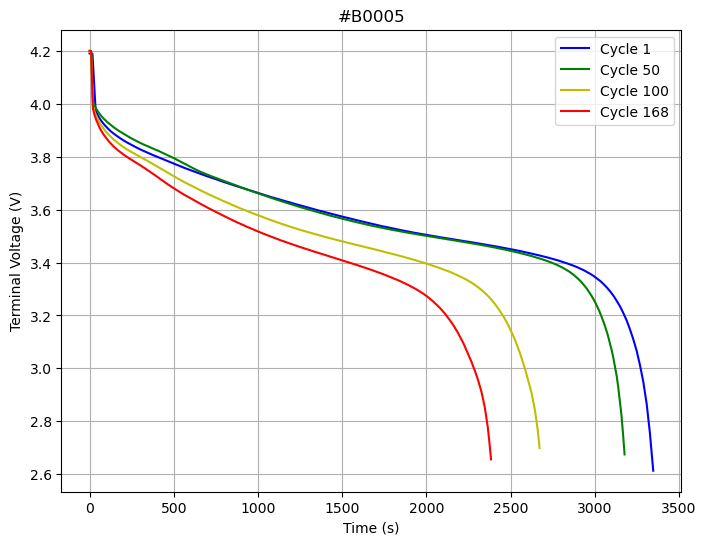

In [9]:


# Làm tròn thời gian thành số nguyên
dataset['time'] = dataset['time'].round(0).astype(int)

# Lọc dữ liệu cho các chu kỳ 1, 50, 100 và chu kỳ cuối (168)
cycle_1_dataset = dataset[dataset['cycle'] == 1]
cycle_50_dataset = dataset[dataset['cycle'] == 50]
cycle_100_dataset = dataset[dataset['cycle'] == 100]
last_cycle = dataset['cycle'].max()  # Chu kỳ cuối (168)
cycle_last_dataset = dataset[dataset['cycle'] == last_cycle]

# Hàm lọc dữ liệu từ đầu đến giá trị voltage tối thiểu
def filter_to_min_voltage(cycle_dataset):
    min_voltage_idx = cycle_dataset['voltage_measured'].idxmin()  # Chỉ số của voltage nhỏ nhất
    return cycle_dataset.loc[:min_voltage_idx]  # Lấy từ đầu đến điểm nhỏ nhất

# Lọc dữ liệu cho từng chu kỳ
cycle_1_filtered = filter_to_min_voltage(cycle_1_dataset)
cycle_50_filtered = filter_to_min_voltage(cycle_50_dataset)
cycle_100_filtered = filter_to_min_voltage(cycle_100_dataset)
cycle_last_filtered = filter_to_min_voltage(cycle_last_dataset)

# Vẽ đồ thị Terminal Voltage từ đầu đến voltage min cho các chu kỳ
plt.figure(figsize=(8, 6))

# Vẽ cho chu kỳ 1
plt.plot(cycle_1_filtered['time'], cycle_1_filtered['voltage_measured'], 'b-', label='Cycle 1')

# Vẽ cho chu kỳ 50
plt.plot(cycle_50_filtered['time'], cycle_50_filtered['voltage_measured'], 'g-', label='Cycle 50')

# Vẽ cho chu kỳ 100
plt.plot(cycle_100_filtered['time'], cycle_100_filtered['voltage_measured'], 'y-', label='Cycle 100')

# Vẽ cho chu kỳ cuối
plt.plot(cycle_last_filtered['time'], cycle_last_filtered['voltage_measured'], 'r-', label=f'Cycle {last_cycle}')

# Cấu hình biểu đồ
plt.xlabel('Time (s)')
plt.ylabel('Terminal Voltage (V)')
plt.title('#B0005')
plt.grid(True)
plt.legend()
plt.show()


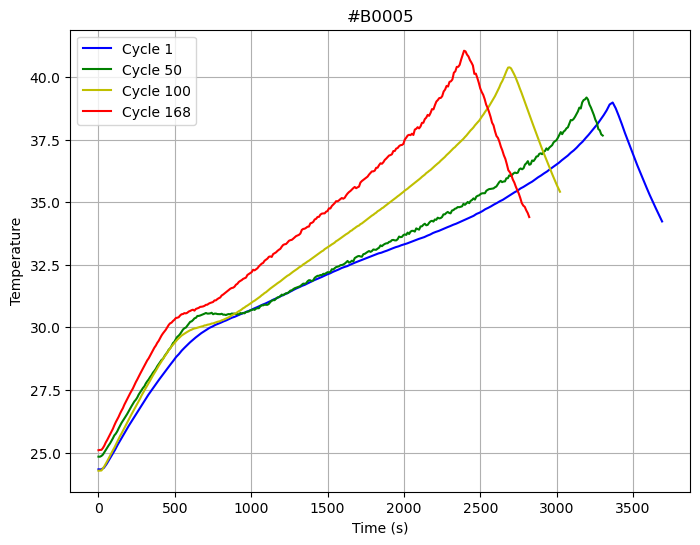

In [4]:
cycle_1_data = dataset[dataset['cycle'] == 1]
cycle_50_data = dataset[dataset['cycle'] == 50]
cycle_100_data = dataset[dataset['cycle'] == 100]
last_cycle = dataset['cycle'].max()  # Chu kỳ cuối (168)
cycle_last_data = dataset[dataset['cycle'] == last_cycle]

# Vẽ đồ thị Temperature cho các chu kỳ trên cùng một biểu đồ
plt.figure(figsize=(8, 6))

# Vẽ Temperature của chu kỳ 1
plt.plot(cycle_1_data['time'], cycle_1_data['temperature_measured'], 'b-', label='Cycle 1')

# Vẽ Temperature của chu kỳ 50
plt.plot(cycle_50_data['time'], cycle_50_data['temperature_measured'], 'g-', label='Cycle 50')

# Vẽ Temperature của chu kỳ 100
plt.plot(cycle_100_data['time'], cycle_100_data['temperature_measured'], 'y-', label='Cycle 100')

# Vẽ Temperature của chu kỳ cuối
plt.plot(cycle_last_data['time'], cycle_last_data['temperature_measured'], 'r-', label=f'Cycle {last_cycle}')

# Cấu hình biểu đồ
plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.title('#B0005')
plt.grid(True)
plt.legend()
plt.show()



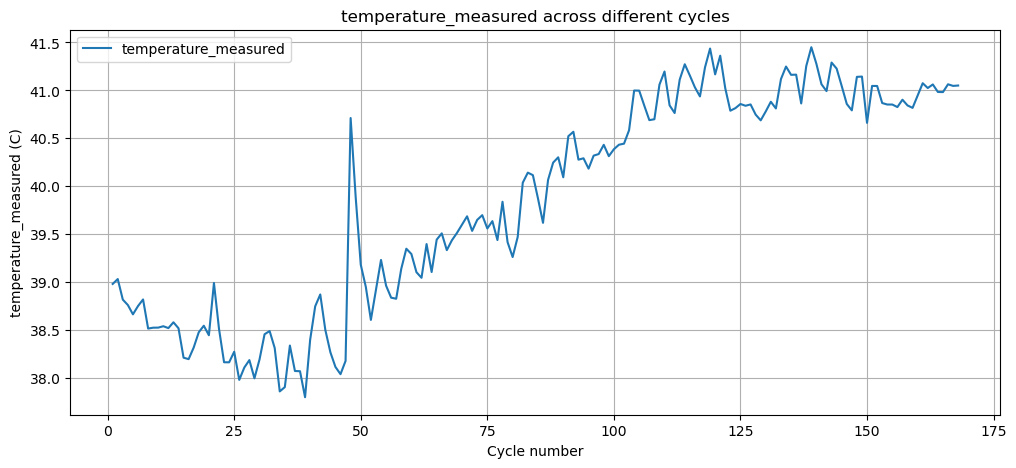

In [49]:
max_temp_per_cycle_discharge = dataset.groupby('cycle')['temperature_measured'].max().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(max_temp_per_cycle_discharge['cycle'], max_temp_per_cycle_discharge['temperature_measured'], label='temperature_measured')
plt.xlabel('Cycle number')
plt.ylabel('temperature_measured (C)')
plt.title('temperature_measured across different cycles')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
capacity.columns

Index(['cycle', 'ambient_temperature', 'datetime', 'capacity'], dtype='object')

In [11]:
capacity.head()

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,1.856487
1,2,24,2008-04-02 19:43:48,1.846327
2,3,24,2008-04-03 00:01:06,1.835349
3,4,24,2008-04-03 04:16:37,1.835263
4,5,24,2008-04-03 08:33:25,1.834646


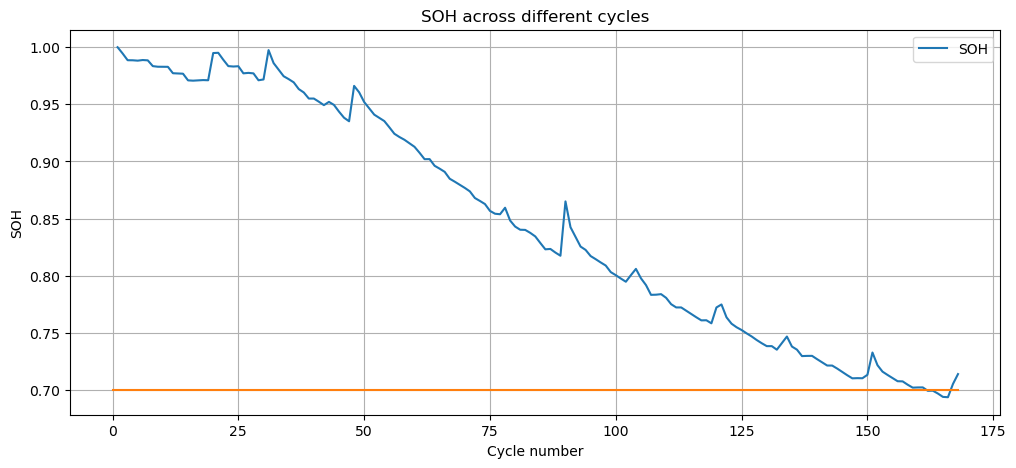

In [14]:
# Ve do thi SOH qua cac chu ky xa
data_soh = capacity['capacity'] / capacity['capacity'].max()
data_cycle = capacity['cycle']

plt.figure(figsize=(12, 5))
plt.plot(data_cycle, data_soh, label='SOH')
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.xlabel('Cycle number')
plt.ylabel('SOH')
plt.title('SOH across different cycles')
plt.grid(True)
plt.legend()
plt.show()

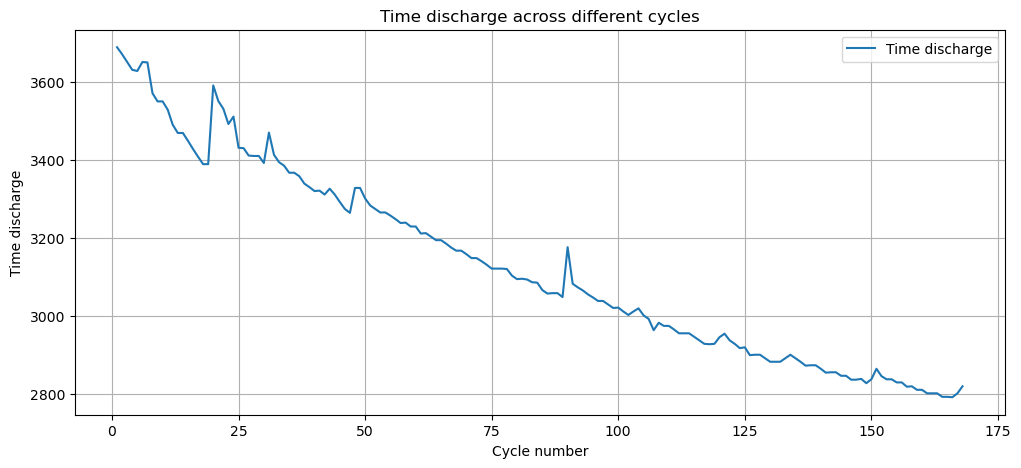

In [21]:
# Vẽ đồ thị biểu diễn thời gian xả qua các chu kỳ

# Lấy dòng cuối cùng của mỗi cycle
last_times_per_cycle = dataset.groupby('cycle').tail(1)[['cycle','time']].reset_index(drop=True)

last_times_per_cycle.head()

plt.figure(figsize=(12, 5))
plt.plot(last_times_per_cycle['cycle'], last_times_per_cycle['time'], label='Time discharge')
plt.xlabel('Cycle number')
plt.ylabel('Time discharge')
plt.title('Time discharge across different cycles')
plt.grid(True)
plt.legend()
plt.show()


PART 2: CHARGE PROCESS

In [9]:
def charge_data(battery): #similarly write a fn for charge data
  mat = loadmat(battery + '.mat')
  c = 0
  chdataset = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'charge' :
            
        ambient_temperature = row['ambient_temperature'][0][0]
        date_time = datetime.datetime(int(row['time'][0][0]),
                                int(row['time'][0][1]),
                                int(row['time'][0][2]),
                                int(row['time'][0][3]),
                                int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
        data = row['data']
        for j in range(len(data[0][0]['Voltage_measured'][0])):
            voltage_measured = data[0][0]['Voltage_measured'][0][j]
            current_measured = data[0][0]['Current_measured'][0][j]
            temperature_measured = data[0][0]['Temperature_measured'][0][j]
            current_charge = data[0][0]['Current_charge'][0][j]
            voltage_charge = data[0][0]['Voltage_charge'][0][j]
            time = data[0][0]['Time'][0][j]
            chdataset.append([c + 1, ambient_temperature, date_time,
                            voltage_measured, current_measured,
                            temperature_measured, current_charge,
                            voltage_charge, time])
        c = c + 1
  return pd.DataFrame(data=chdataset,
                      columns=['cycle', 'ambient_temperature','data_time',
                               'voltage_measured','current_measured',
                               'temperature_measured','current_charge',
                               'voltage_charge', 'time'])

data_charge = charge_data('B0005')



In [13]:
charge_b5 = charge_data('B0018')
charge_b5.to_csv('charge_B0018.csv')

In [30]:
data_charge.columns

Index(['cycle', 'ambient_temperature', 'data_time', 'voltage_measured',
       'current_measured', 'temperature_measured', 'current_charge',
       'voltage_charge', 'time'],
      dtype='object')

In [31]:
data_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541173 entries, 0 to 541172
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   cycle                 541173 non-null  int64         
 1   ambient_temperature   541173 non-null  uint8         
 2   data_time             541173 non-null  datetime64[ns]
 3   voltage_measured      541173 non-null  float64       
 4   current_measured      541173 non-null  float64       
 5   temperature_measured  541173 non-null  float64       
 6   current_charge        541173 non-null  float64       
 7   voltage_charge        541173 non-null  float64       
 8   time                  541173 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), uint8(1)
memory usage: 33.5 MB


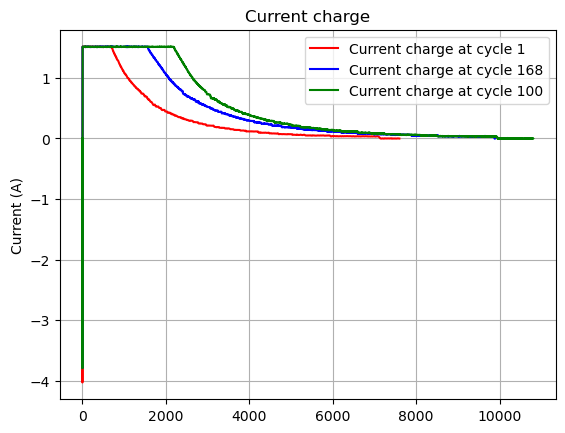

In [63]:
# Vẽ đồ thị biểu diễn dòng điện và điện áp trong quá trình sạc ở các chu kỳ khác nhau
data_cycle_1 = data_charge[data_charge['cycle'] == 1][['time','current_measured','voltage_measured']]
data_cycle_168 = data_charge[data_charge['cycle'] == 168][['time','current_measured','voltage_measured']]
data_cycle_100 = data_charge[data_charge['cycle'] == 100][['time','current_measured','voltage_measured']]
data_cycle_50 = data_charge[data_charge['cycle'] == 50][['time','current_measured','voltage_measured']]

plt.plot(data_cycle_1['time'], data_cycle_1['current_measured'], label='Current charge at cycle 1', color='red')
plt.plot(data_cycle_168['time'], data_cycle_168['current_measured'], label='Current charge at cycle 168', color='blue')
plt.plot(data_cycle_100['time'], data_cycle_100['current_measured'], label='Current charge at cycle 100', color='green')

plt.ylabel('Current (A)')
plt.title('Current charge')
plt.legend()
plt.grid(True)
plt.show()


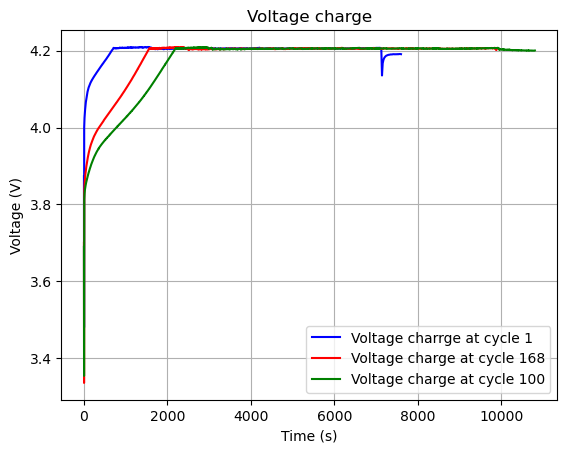

In [62]:
plt.plot(data_cycle_1['time'], data_cycle_1['voltage_measured'], label='Voltage charrge at cycle 1',color='blue')
plt.plot(data_cycle_168['time'], data_cycle_168['voltage_measured'], label='Voltage charge at cycle 168', color='red')
plt.plot(data_cycle_100['time'], data_cycle_100['voltage_measured'], label='Voltage charge at cycle 100', color='green')


plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage charge')
plt.legend()
plt.grid(True)
plt.show()

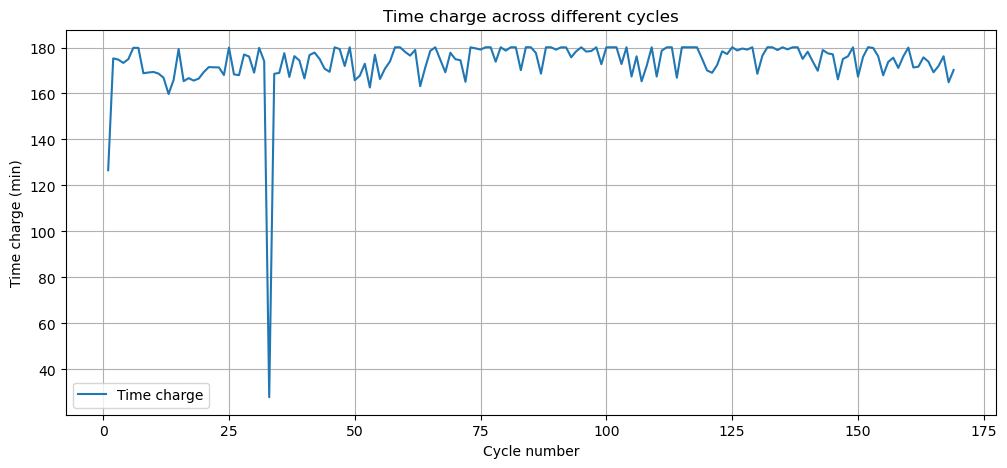

In [37]:
# Vẽ đồ thị biểu diễn thời gian sạc qua các chu kỳ sạc
# Lấy dòng cuối cùng của mỗi cycle
charge_times_per_cycle = data_charge.groupby('cycle').tail(1)[['cycle','time']].reset_index(drop=True)

charge_times_per_cycle = charge_times_per_cycle.drop(charge_times_per_cycle.index[-1])
plt.figure(figsize=(12, 5))
plt.plot(charge_times_per_cycle['cycle'], charge_times_per_cycle['time'] /60, label='Time charge')
plt.xlabel('Cycle number')
plt.ylabel('Time charge (min)')
plt.title('Time charge across different cycles')
plt.grid(True)
plt.legend()
plt.show()


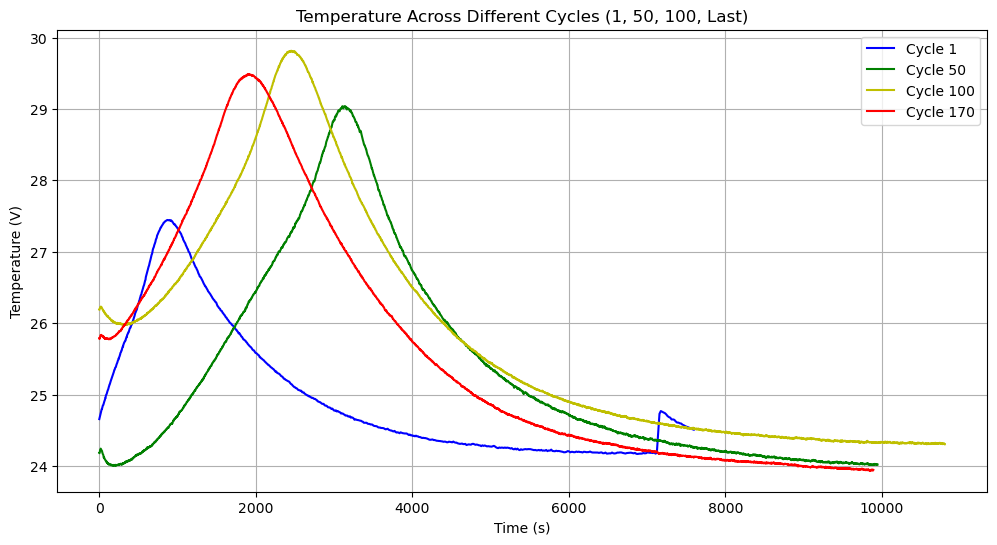

In [43]:
cycle_1_data = data_charge[data_charge['cycle'] == 1]
cycle_50_data = data_charge[data_charge['cycle'] == 50]
cycle_100_data = data_charge[data_charge['cycle'] == 100]
last_cycle = data_charge['cycle'].max()  # Chu kỳ cuối (168)
cycle_last_data = data_charge[data_charge['cycle'] == 168]

# Vẽ đồ thị Temperature cho các chu kỳ trên cùng một biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ Temperature của chu kỳ 1
plt.plot(cycle_1_data['time'], cycle_1_data['temperature_measured'], 'b-', label='Cycle 1')

# Vẽ Temperature của chu kỳ 50
plt.plot(cycle_50_data['time'], cycle_50_data['temperature_measured'], 'g-', label='Cycle 50')

# Vẽ Temperature của chu kỳ 100
plt.plot(cycle_100_data['time'], cycle_100_data['temperature_measured'], 'y-', label='Cycle 100')

# Vẽ Temperature của chu kỳ cuối
plt.plot(cycle_last_data['time'], cycle_last_data['temperature_measured'], 'r-', label=f'Cycle {last_cycle}')

# Cấu hình biểu đồ
plt.xlabel('Time (s)')
plt.ylabel('Temperature (V)')
plt.title('Temperature Across Different Cycles (1, 50, 100, Last)')
plt.grid(True)
plt.legend()
plt.show()

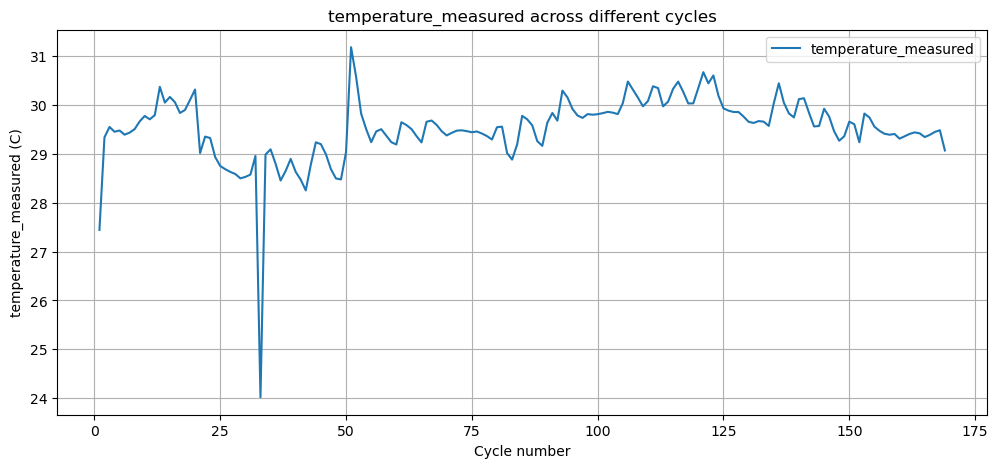

In [46]:
max_temp_per_cycle = data_charge.groupby('cycle')['temperature_measured'].max().reset_index()
max_temp_per_cycle = max_temp_per_cycle.drop(max_temp_per_cycle.index[-1])
plt.figure(figsize=(12, 5))
plt.plot(max_temp_per_cycle['cycle'], max_temp_per_cycle['temperature_measured'], label='temperature_measured')
plt.xlabel('Cycle number')
plt.ylabel('temperature_measured (C)')
plt.title('temperature_measured across different cycles')
plt.grid(True)
plt.legend()
plt.show()

PART 3: IMPEDANCE

In [69]:
# READ DATA
def impedance_data(battery): #similarly write a fn for charge data
  mat = loadmat(battery + '.mat')
  c = 0
  chdataset = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'impedance':
            
        ambient_temperature = row['ambient_temperature'][0][0]
        date_time = datetime.datetime(int(row['time'][0][0]),
                                int(row['time'][0][1]),
                                int(row['time'][0][2]),
                                int(row['time'][0][3]),
                                int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
        data = row['data']
        for j in range(len(data[0][0]['Sense_current'][0])):
            sense_current = data[0][0]['Sense_current'][0][j]
            battery_current = data[0][0]['Battery_current'][0][j]
            current_ratio = data[0][0]['Current_ratio'][0][j]
            #battery_impedance = data[0][0]['Battery_impedance'][0][j]
            re = data[0][0]['Re'][0][j]
            rct = data[0][0]['Rct'][0][j]
            chdataset.append([c + 1, ambient_temperature, date_time,
                            sense_current, battery_current,
                            current_ratio,
                            re, rct])
        c = c + 1
    return pd.DataFrame(data=chdataset,
                      columns=['cycle', 'ambient_temperature','data_time',
                               'sense_current','battery_current',
                               'current_ratio',
                               're','rct'])

data_impedance = impedance_data('B0005')


In [70]:
data_impedance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cycle                0 non-null      object
 1   ambient_temperature  0 non-null      object
 2   data_time            0 non-null      object
 3   sense_current        0 non-null      object
 4   battery_current      0 non-null      object
 5   current_ratio        0 non-null      object
 6   re                   0 non-null      object
 7   rct                  0 non-null      object
dtypes: object(8)
memory usage: 132.0+ bytes


In [68]:
data_impedance.head()

,cycle,ambient_temperature,data_time,sense_current,battery_current,current_ratio,re,rct
